<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Jan 13 16:42:23 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.61                 Driver Version: 556.19         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   49C    P8              3W /   80W |     746MiB /   8188MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.9.1+cu128


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = MNIST(
    root="data", train=False, download=True, transform=ToTensor(), target_transform=None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

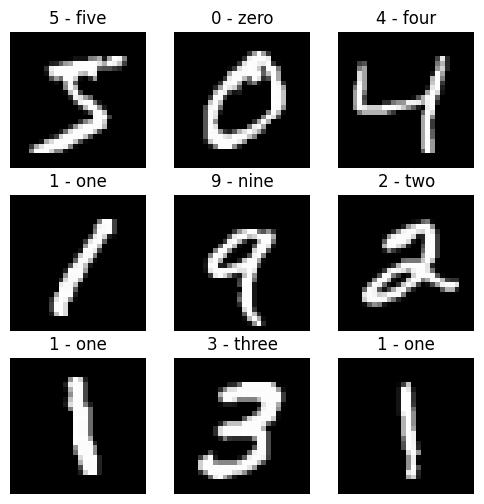

In [28]:
import matplotlib.pyplot as plt

class_names = train_data.classes

torch.manual_seed(42)

nrows = 3
ncols = 3

plt.figure(figsize=(6, 6))
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    image, label = train_data[i]
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [34]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn

class MNISTModelV2(nn.Module):
    def __init__(self, input_unit: int, hidden_unit: int, output_unit: int):
        super().__init__()

        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_unit,
                out_channels=hidden_unit,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_unit,
                out_channels=hidden_unit,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_unit,
                out_channels=hidden_unit,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_unit,
                out_channels=hidden_unit,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_unit*7*7,
                out_features=output_unit
            )
        )

    def forward(self, x):
        x = self.cnn_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.cnn_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.linear_layer(x)

        return x

model_v2 = MNISTModelV2(
    input_unit=1,
    hidden_unit=10,
    output_unit=len(class_names)
).to(device)

In [119]:
torch.softmax(model_v2(train_data[0][0].unsqueeze(dim=1).to(device)), dim=1)

tensor([[0.0997, 0.0972, 0.1001, 0.1025, 0.0975, 0.0992, 0.0982, 0.0999, 0.1022,
         0.1033]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [125]:
from torchmetrics import Accuracy
from tqdm.auto import tqdm

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

In [ ]:
def training_loop(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    num_epochs: int,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: str
):
    for epoch in tqdm(range(num_epochs), desc="Training Model"):
        train_loss, train_acc = 0, 0

        print(f"Epoch {epoch}")
        model.train()
        model = model.to(device)
        for X, y in train_dataloader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_pred_logits = model(X)
            y_pred = y_pred_logits.argmax(dim=1)

            # Calculate loss and accuracy
            loss = loss_fn(y_pred_logits, y)
            train_loss += loss

            acc = accuracy_fn(y_pred.cpu(), y.cpu()) * 100
            train_acc += acc

            # Optimizer zero grad
            optimizer.zero_grad()

            # Loss backward
            loss.backward()

            # Optimizer step
            optimizer.step()

        train_loss /= len(dataloader)
        train_acc /= len(dataloader)

        print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
        print("-"*200)

In [131]:
import time

In [132]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define model_v2
model_v2 = MNISTModelV2(input_unit=1, hidden_unit=10, output_unit=len(class_names))

# Define loss_fn, optimizer, accuracy function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

# Calculate the time taken for model training
start_time = time.time()
training_loop(
    model=model_v2,
    dataloader=train_dataloader,
    num_epochs=5,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn,
    device=device,
)

end_time = time.time()

# Print the model training time
model_gpu_train_time = end_time - start_time
print(f"Model trained in GPU taken: {model_gpu_train_time} seconds")

Training Model:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
Train loss: 0.26907 | Train acc: 91.18%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1
Train loss: 0.06830 | Train acc: 97.86%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 2
Train loss: 0.05302 | Train acc: 98.34%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 3
Train loss: 0.04497 | Train acc: 98.61%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoc

In [135]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define model_v2
model_v2 = MNISTModelV2(
    input_unit=1,
    hidden_unit=10,
    output_unit=len(class_names)
)

# Define loss_fn, optimizer, accuracy function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

# Calculate the time taken for model training
start_time = time.time()
training_loop(
    model=model_v2,
    dataloader=train_dataloader,
    num_epochs=5,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn,
    device="cpu",
)

end_time = time.time()

# Print the model training time
model_cpu_train_time = end_time - start_time
print(f"Model trained in CPU taken: {model_cpu_train_time} seconds")

Training Model:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
Train loss: 0.26634 | Train acc: 91.27%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1
Train loss: 0.06887 | Train acc: 97.83%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 2
Train loss: 0.05359 | Train acc: 98.35%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 3
Train loss: 0.04511 | Train acc: 98.58%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoc

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [169]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model output raw logits)
            pred_logits = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [168]:
def model_evaluation(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    accuracy_fn,
    device: str
):
    model.eval()
    model = model.to(device)
    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc="Model Predicting"):
            X, y = X.to(device), y.to(device)

            # forward pass
            y_pred_logits = model(X)
            y_pred = torch.softmax(y_pred_logits.squeeze(), dim=0).argmax(dim=1)

            # calculate the loss function and accuracy
            batch_loss = loss_fn(y_pred_logits, y)
            loss += batch_loss 

            batch_acc = accuracy_fn(y_pred, y)
            acc += batch_acc

        loss /= len(dataloader)
        acc /= len(dataloader)

    # return 
    return {
        "model": model.nma,
        "model_loss": loss,
        "model_accuracy": acc
    } 

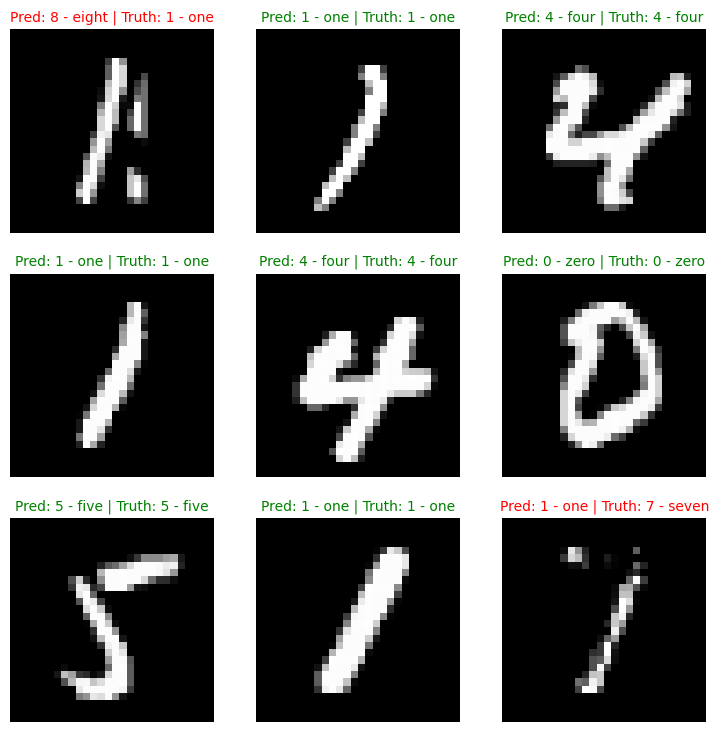

In [179]:
import random

torch.manual_seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


y_pred = make_predictions(model=model_v2, data=test_samples, device="cpu")
pred_classes = y_pred.argmax(dim=1)


# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i + 1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, eg "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [204]:
a = torch.tensor([[-7.0747e+00,  2.2232e+00,  2.6391e+00,  5.9584e+00, -4.5946e+00,
         -5.0274e+00, -1.4632e+01,  1.9652e+01, -6.9173e+00,  7.5026e+00],
        [ 3.4621e+00,  1.8709e+00,  1.6289e+01, -3.0492e+00, -3.9578e+00,
         -7.9372e+00,  2.7795e+00, -7.3917e+00,  5.9632e+00, -8.8479e+00]])

torch.softmax(a, dim=0).argmax(dim=1)

tensor([7, 6])

In [216]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_pred_tensor = []
model_v2.eval()
model_v2 = model_v2.to(device)
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Model Predicting"):
        X, y = X.to(device), y.to(device)
        y_pred_logit = model_v2(X)
        y_pred = torch.softmax(y_pred_logit, dim=0).argmax(dim=1)
        y_pred_tensor.append(y_pred.cpu())

    y_pred_tensor = torch.cat(y_pred_tensor)
y_pred_tensor

Model Predicting:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

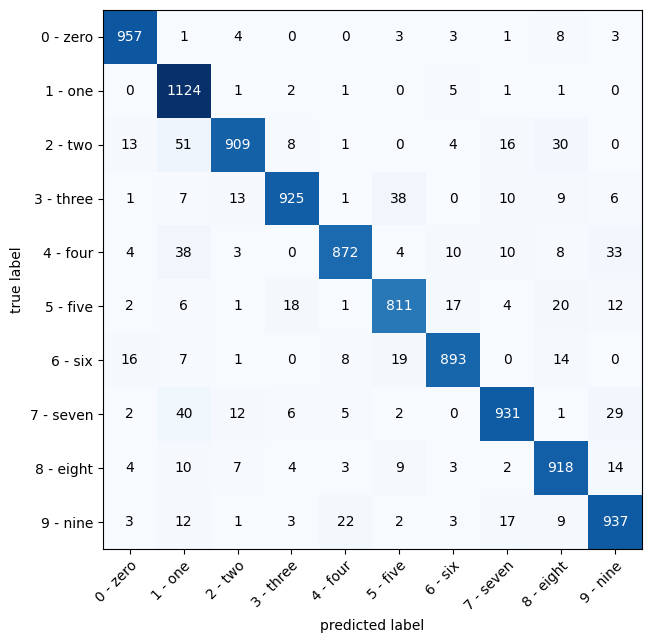

In [217]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # matplotlib works with numpy
    class_names=class_names,
    figsize=(10, 7),
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?